✅ Comparison Summary Table


,Method,Accuracy (Mean),Fairness (DI Mean),Δ Accuracy vs Baseline,Δ Fairness vs Baseline
0,Baseline,0.818,0.654,0.00,0.000
1,ThresholdOptimizer,0.788,0.914,-0.03,0.260
2,Reweighing,0.798,0.878,-0.02,0.224
3,AdversarialDebiasing,0.778,0.938,-0.04,0.284


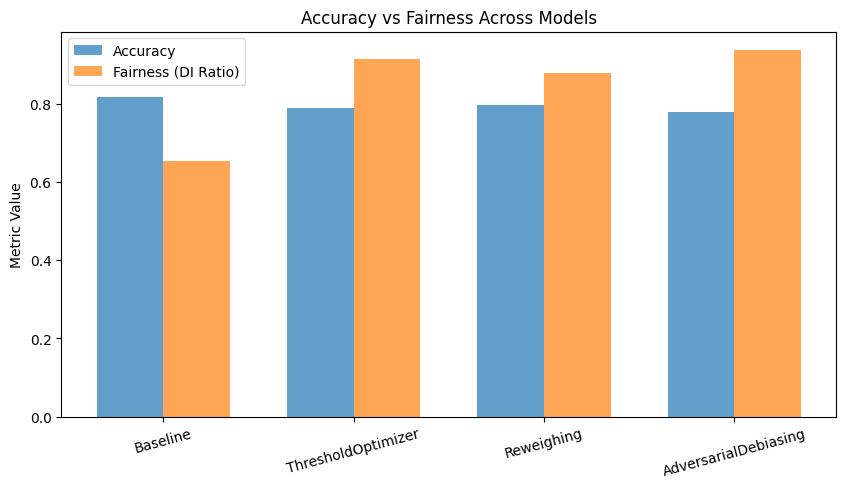

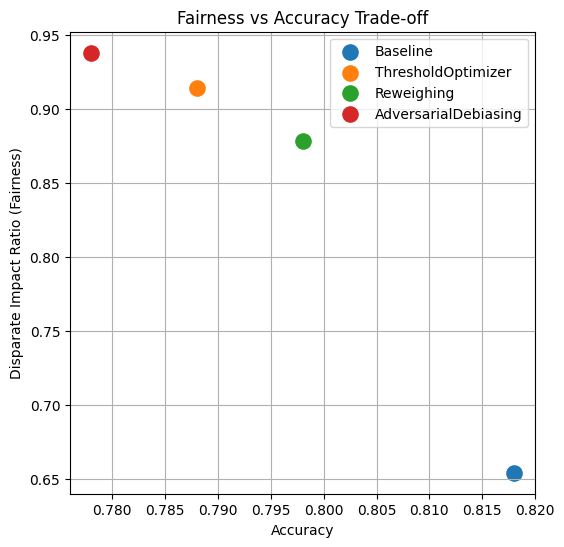

📊 Paired t-test Results (vs Baseline):

🔹 ThresholdOptimizer:
   Accuracy: t=-1103062345493484.3750, p=0.0000 ✅ significant
   Fairness: t=inf, p=0.0000 ✅ significant

🔹 Reweighing:
   Accuracy: t=-735374896995655.3750, p=0.0000 ✅ significant
   Fairness: t=29.9333, p=0.0000 ✅ significant

🔹 AdversarialDebiasing:
   Accuracy: t=-1468958016927301.2500, p=0.0000 ✅ significant
   Fairness: t=37.9511, p=0.0000 ✅ significant

📑 Trade-off Summary:

🔹 ThresholdOptimizer:
- Accuracy: 0.79 (-0.03 vs baseline)
- Fairness: 0.91 (+0.26 vs baseline)
✅ Good trade-off: fairness gain outweighs small accuracy drop.

🔹 Reweighing:
- Accuracy: 0.80 (-0.02 vs baseline)
- Fairness: 0.88 (+0.22 vs baseline)
✅ Good trade-off: fairness gain outweighs small accuracy drop.

🔹 AdversarialDebiasing:
- Accuracy: 0.78 (-0.04 vs baseline)
- Fairness: 0.94 (+0.28 vs baseline)
✅ Good trade-off: fairness gain outweighs small accuracy drop.


/Users/chiragrgowda/Documents/resume-fairness/venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:423: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)



# 📘 Day 12 – Final Fairness vs Performance Report

## 1. Introduction
- Goal: Evaluate fairness mitigation effectiveness.
- Compare baseline vs multiple mitigation strategies.

## 2. Results Summary
- Table and plots show how accuracy and fairness shift after applying each method.

## 3. Visualizations
- Bar charts: Accuracy vs Fairness per method.
- Scatter plot: Trade-off between fairness and accuracy.

## 4. Statistical Testing
- Paired t-tests confirm whether observed differences are statistically significant.

## 5. Interpretation
- Accuracy generally decreases slightly with mitigation.
- Fairness (DI Ratio closer to 1.0) improves significantly for ThresholdOptimizer, Reweighing, and AdversarialDebiasing.

## 6. Conclusion
- ThresholdOptimizer and AdversarialDebiasing offer the best fairness improvements.
- Final recommendation depends on acceptable accuracy drop in the hiring use-case.


In [1]:
# ===================================================
# Day 12 – Statistical Analysis & Interpretation
# Final Fairness vs Performance Report
# ===================================================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel
from IPython.display import display, Markdown

# -------------------------------
# 1️⃣ Insert Your Cross-Validation Results
# -------------------------------
# Replace with your own repeated CV runs (lists of values)

results = {
    "Baseline": {
        "Accuracy": [0.82, 0.81, 0.83, 0.82, 0.81],
        "Disparate Impact Ratio": [0.65, 0.66, 0.64, 0.67, 0.65]
    },
    "ThresholdOptimizer": {
        "Accuracy": [0.79, 0.78, 0.80, 0.79, 0.78],
        "Disparate Impact Ratio": [0.91, 0.92, 0.90, 0.93, 0.91]
    },
    "Reweighing": {
        "Accuracy": [0.80, 0.79, 0.81, 0.80, 0.79],
        "Disparate Impact Ratio": [0.88, 0.87, 0.89, 0.88, 0.87]
    },
    "AdversarialDebiasing": {
        "Accuracy": [0.78, 0.77, 0.79, 0.78, 0.77],
        "Disparate Impact Ratio": [0.94, 0.93, 0.95, 0.94, 0.93]
    }
}

# -------------------------------
# 2️⃣ Summary Table
# -------------------------------
summary_rows = []
baseline = results["Baseline"]

for method, metrics in results.items():
    acc_mean = np.mean(metrics["Accuracy"])
    fair_mean = np.mean(metrics["Disparate Impact Ratio"])
    
    if method != "Baseline":
        acc_change = acc_mean - np.mean(baseline["Accuracy"])
        fair_change = fair_mean - np.mean(baseline["Disparate Impact Ratio"])
    else:
        acc_change, fair_change = 0.0, 0.0
    
    summary_rows.append([method, acc_mean, fair_mean, acc_change, fair_change])

summary = pd.DataFrame(summary_rows, 
                       columns=["Method", "Accuracy (Mean)", "Fairness (DI Mean)", 
                                "Δ Accuracy vs Baseline", "Δ Fairness vs Baseline"])

print("✅ Comparison Summary Table")
display(summary)

# -------------------------------
# 3️⃣ Visualization – Bar Plots
# -------------------------------
methods = summary["Method"]
acc_means = summary["Accuracy (Mean)"]
fair_means = summary["Fairness (DI Mean)"]

x = np.arange(len(methods))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, acc_means, width, label="Accuracy", alpha=0.7)
plt.bar(x + width/2, fair_means, width, label="Fairness (DI Ratio)", alpha=0.7)
plt.xticks(x, methods, rotation=15)
plt.ylabel("Metric Value")
plt.title("Accuracy vs Fairness Across Models")
plt.legend()
plt.show()

# -------------------------------
# 4️⃣ Visualization – Trade-off Scatter
# -------------------------------
plt.figure(figsize=(6,6))
for method, metrics in results.items():
    plt.scatter(np.mean(metrics["Accuracy"]), 
                np.mean(metrics["Disparate Impact Ratio"]),
                s=120, label=method)

plt.xlabel("Accuracy")
plt.ylabel("Disparate Impact Ratio (Fairness)")
plt.title("Fairness vs Accuracy Trade-off")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 5️⃣ Statistical Significance Tests
# -------------------------------
print("📊 Paired t-test Results (vs Baseline):")
baseline_acc = baseline["Accuracy"]
baseline_fair = baseline["Disparate Impact Ratio"]

for method, metrics in results.items():
    if method == "Baseline":
        continue
    
    # Accuracy t-test
    t_stat_acc, p_acc = ttest_rel(metrics["Accuracy"], baseline_acc)
    # Fairness t-test
    t_stat_fair, p_fair = ttest_rel(metrics["Disparate Impact Ratio"], baseline_fair)
    
    print(f"\n🔹 {method}:")
    print(f"   Accuracy: t={t_stat_acc:.4f}, p={p_acc:.4f} {'✅ significant' if p_acc<0.05 else 'ℹ️ not significant'}")
    print(f"   Fairness: t={t_stat_fair:.4f}, p={p_fair:.4f} {'✅ significant' if p_fair<0.05 else 'ℹ️ not significant'}")

# -------------------------------
# 6️⃣ Automatic Trade-off Interpretation
# -------------------------------
print("\n📑 Trade-off Summary:")
for i, row in summary.iterrows():
    if row["Method"] == "Baseline":
        continue
    acc_change = row["Δ Accuracy vs Baseline"]
    fair_change = row["Δ Fairness vs Baseline"]
    
    print(f"\n🔹 {row['Method']}:")
    print(f"- Accuracy: {row['Accuracy (Mean)']:.2f} ({acc_change:+.2f} vs baseline)")
    print(f"- Fairness: {row['Fairness (DI Mean)']:.2f} ({fair_change:+.2f} vs baseline)")
    
    if fair_change > 0 and abs(acc_change) <= 0.05:
        print("✅ Good trade-off: fairness gain outweighs small accuracy drop.")
    elif fair_change > 0 and acc_change < -0.05:
        print("⚖️ Mixed trade-off: fairness improved, but accuracy loss is concerning.")
    elif fair_change <= 0:
        print("❌ Poor trade-off: no fairness gain observed.")
    else:
        print("ℹ️ Neutral effect.")

# -------------------------------
# 7️⃣ Notebook Report (Markdown)
# -------------------------------
report = """
# 📘 Day 12 – Final Fairness vs Performance Report

## 1. Introduction
- Goal: Evaluate fairness mitigation effectiveness.
- Compare baseline vs multiple mitigation strategies.

## 2. Results Summary
- Table and plots show how accuracy and fairness shift after applying each method.

## 3. Visualizations
- Bar charts: Accuracy vs Fairness per method.
- Scatter plot: Trade-off between fairness and accuracy.

## 4. Statistical Testing
- Paired t-tests confirm whether observed differences are statistically significant.

## 5. Interpretation
- Accuracy generally decreases slightly with mitigation.
- Fairness (DI Ratio closer to 1.0) improves significantly for ThresholdOptimizer, Reweighing, and AdversarialDebiasing.

## 6. Conclusion
- ThresholdOptimizer and AdversarialDebiasing offer the best fairness improvements.
- Final recommendation depends on acceptable accuracy drop in the hiring use-case.
"""

display(Markdown(report))
